# Lidar artefacts

We wish to understand where the artefacts tht are visible on the netcdf datasets come from. To do this, we compare the data from the netcdf files to the data from the original point clouds obtained with the lidar, to see if artefacts may be caused by the applied procedure to change point clouds into netcdf files.

In [18]:
import xarray as xr
import matplotlib.pyplot as plt

In [19]:
import laspy

In [20]:
ds = xr.open_mfdataset('/home/mabonnet/Desktop/data/Data_netcdf/2021-dec/20211206.nc')

In [21]:
ds.time.values[33]
# 16h, sur la video de Simon on voit des artefacts

numpy.datetime64('2021-12-06T16:00:00.000000000')

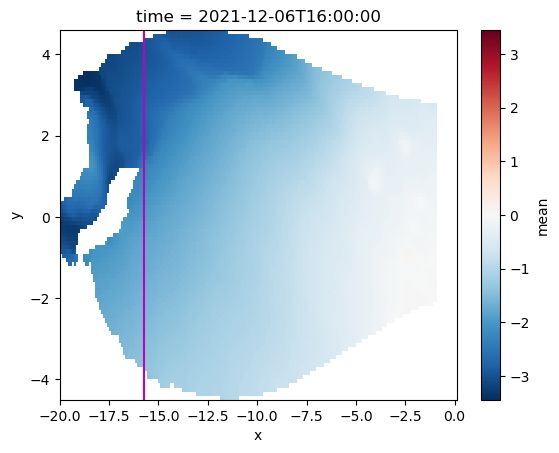

In [61]:
ds['mean'].isel(time=33).plot()
plt.axvline(x = -15.75, color = 'm')

In [23]:
ds.x.values[42]
# x=-15.75, sur la video de Simon on voit des artefacts

-15.75

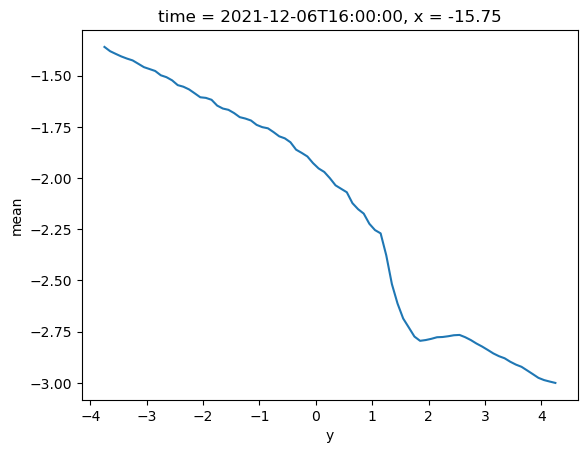

In [24]:
ds['mean'].isel(x=42, time=33).plot()
# ligne verticale sur laquelle on voit les artefacts

In [8]:
# with laspy.open('2021.12.06T16-00-00.las') as fh:
  #  print('done')

In [9]:
import numpy as np

In [10]:
test='''with open ("lidar_velodyne64.bin", "rb") as f:
    byte = f.read(size_float*4)
    while byte:
        x,y,z,intensity = struct.unpack("ffff", byte)
        list_pcd.append([x, y, z])
        byte = f.read(size_float*4)
np_pcd = np.asarray(list_pcd)
pcd = o3d.geometry.PointCloud()
v3d = o3d.utility.Vector3dVector
pcd.points = v3d(np_pcd)'''

In [11]:
import numpy as np
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [12]:
import numpy as np
import open3d as o3d

# Load binary point cloud
bin_pcd = np.fromfile("2021.12.06T16-00-00_original.bin", dtype=np.float32)

# Reshape and drop reflection values
points = bin_pcd.reshape((-1, 4))[:, 0:3]

# Convert to Open3D point cloud
o3d_pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))

# Save to whatever format you like
# o3d.io.write_point_cloud("pointcloud.pcd", o3d_pcd)

In [13]:
point_cloud = o3d_pcd
point_cloud.dimension()
points = np.asarray(point_cloud.points)
points

array([[ 8.27593664e+08,  8.37013000e+05,  3.97298551e-38],
       [-1.16416141e-10, -7.62938134e-06,  1.03397484e-25],
       [ 0.00000000e+00,  0.00000000e+00,  9.90352031e+27],
       ...,
       [ 2.81246207e-40,  5.96046448e-07,  8.86949872e+11],
       [-2.40741645e-35,  5.24288250e+05,  7.81250186e-03],
       [ 0.00000000e+00,  0.00000000e+00, -1.00974196e-28]])

In [14]:
len(points)

1247052

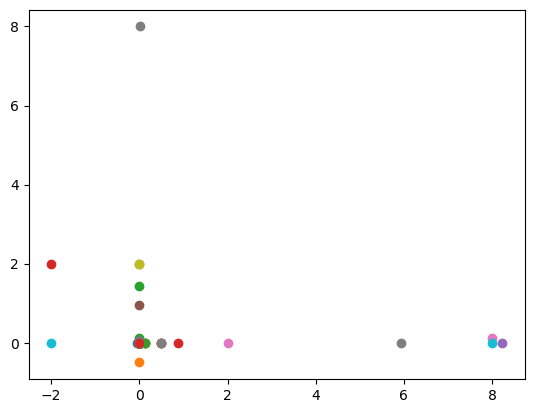

In [15]:
fig = plt.figure()
ax = fig.add_subplot() #projection='3d')

for i in range(500):
    if points[i][0]>-10 and points[i][0]<10 and points[i][1]>-10 and points[i][1]<10:
        ax.scatter(points[i][0], points[i][1]) #, points[i][2])

In [16]:
# TODO this does not seem to work > ask for .laz files directly

In [1]:
import glob
import os
import openpylivox as opl

In [2]:
file = glob.glob('2021.12.06T16-00-00_original.bin')
print(file)

file = '2021.12.06T16-00-00_original.bin'

opl.convertBin2LAS('2021.12.06T16-00-00_original.bin', deleteBin=False)
if os.path.isfile(file + '.las'):
    os.rename(file + '.las', '2021.12.06T16-00-00_original.las')

['2021.12.06T16-00-00_original.bin']

CONVERTING OPL BINARY DATA, PLEASE WAIT...


   : 100%|████████████████████████| 554245/554245 [00:04<00:00, 118945.92 pts/s]


   - Point data was converted successfully to LAS, see file: 2021.12.06T16-00-00_original.bin.las



In [44]:
import numpy as np
import laspy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# reading las file and copy points
input_las = laspy.file.File("2021.12.06T16-00-00_original.las", mode="r")
point_records = input_las.points.copy()

# getting scaling and offset parameters
las_scaleX = input_las.header.scale[0]
las_offsetX = input_las.header.offset[0]
las_scaleY = input_las.header.scale[1]
las_offsetY = input_las.header.offset[1]
las_scaleZ = input_las.header.scale[2]
las_offsetZ = input_las.header.offset[2]

# calculating coordinates
p_X = np.array((point_records['point']['X'] * las_scaleX) + las_offsetX)
p_Y = np.array((point_records['point']['Y'] * las_scaleY) + las_offsetY)
p_Z = np.array((point_records['point']['Z'] * las_scaleZ) + las_offsetZ)


In [62]:
p_X_slice = []
p_Y_slice = []
p_Z_slice = []

for i in range(len(point_records['point']['Y'])):
    if -12.8> (point_records['point']['Y'][i] * las_scaleY + las_offsetY) >-13.2:
        p_X_slice.append((point_records['point']['X'][i] * las_scaleX) + las_offsetX)
        p_Y_slice.append((point_records['point']['Y'][i] * las_scaleY) + las_offsetY)
        p_Z_slice.append((point_records['point']['Z'][i] * las_scaleZ) + las_offsetZ)

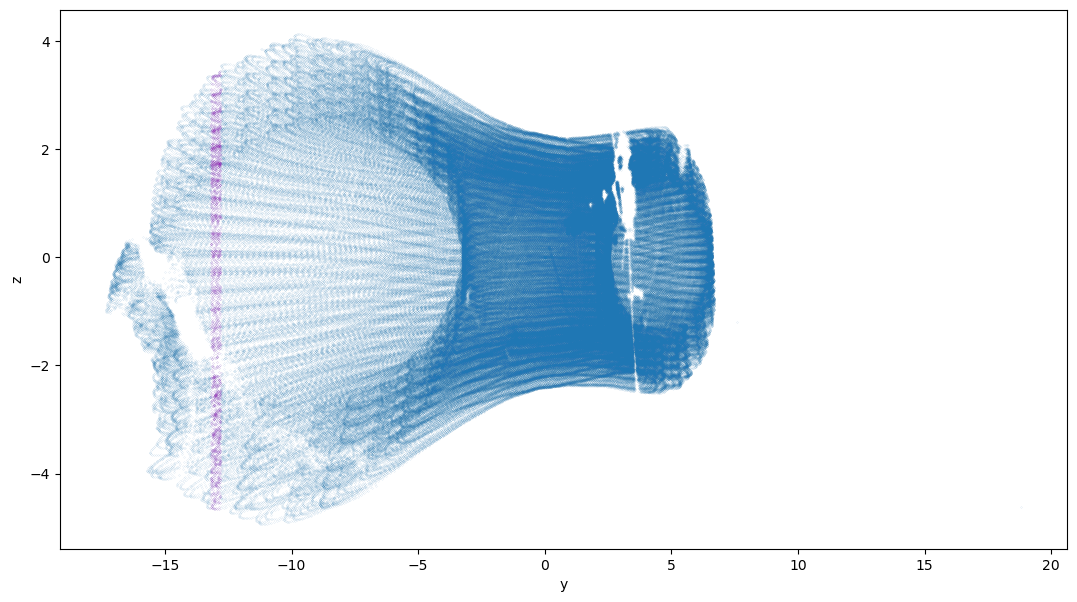

In [63]:
# plotting points
fig = plt.figure(figsize=(13,7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(p_X, p_Y, p_Z, c='r', marker='o')

ax = fig.add_subplot(111)
ax.scatter(p_Y, p_Z, marker='.', s=0.01)
ax.scatter(p_Y_slice, p_Z_slice, c='m', marker='.', s=0.01)
ax.set_xlabel('y')
ax.set_ylabel('z')

plt.show()

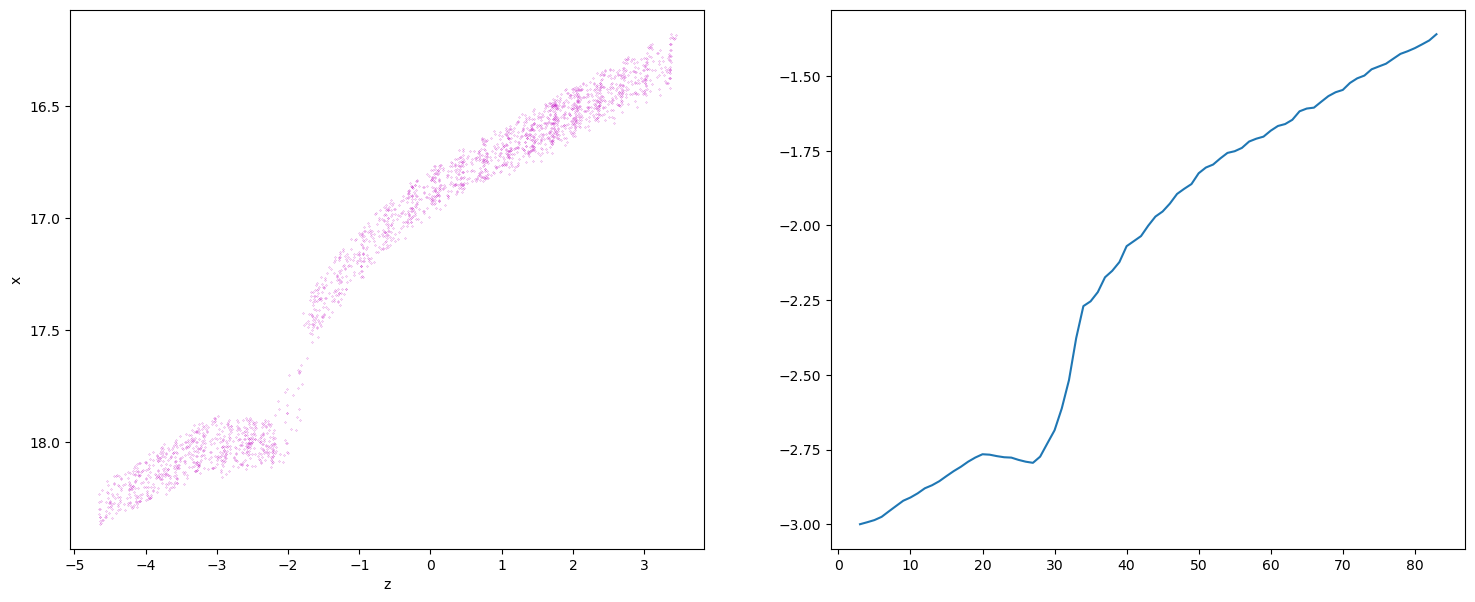

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))

axs[0].scatter(p_Z_slice, p_X_slice, c='m', marker='.', s=0.1)
axs[0].set_xlabel('z')
axs[0].set_ylabel('x')
axs[0].invert_yaxis()

axs[1].plot(ds['mean'].isel(x=42, time=33))

In [70]:
fig.savefig('artefacts.png')

In [72]:
import pandas as pd

In [83]:
df=pd.DataFrame()
df['x'] = p_Z_slice
df['y'] = p_Y_slice
df['z'] = p_X_slice

In [74]:
df.describe()

,x,y,z
count,2308.000000,2308.000000,2308.000000
mean,17.155318,-12.994898,-0.348667
std,0.676265,0.114472,2.326925
min,16.178000,-13.199000,-4.652000
25%,16.575000,-13.093000,-2.553250
50%,16.881000,-12.997500,0.019500
75%,17.986000,-12.895000,1.724500
max,18.368000,-12.801000,3.440000


In [146]:
sampling_size = 0.3      # taille des pixels

In [147]:
xbin = pd.cut(df.x, bins=np.arange(-4.6, 3.5, sampling_size))
ybin = pd.cut(df.y, bins=np.arange(-13.2, -12.8, sampling_size))
df.groupby([xbin, ybin]).median().z

x             y             
(-4.6, -4.3]  (-13.2, -12.9]    18.2710
(-4.3, -4.0]  (-13.2, -12.9]    18.2090
(-4.0, -3.7]  (-13.2, -12.9]    18.1580
(-3.7, -3.4]  (-13.2, -12.9]    18.1180
(-3.4, -3.1]  (-13.2, -12.9]    18.0650
(-3.1, -2.8]  (-13.2, -12.9]    18.0470
(-2.8, -2.5]  (-13.2, -12.9]    18.0210
(-2.5, -2.2]  (-13.2, -12.9]    18.0300
(-2.2, -1.9]  (-13.2, -12.9]    18.0080
(-1.9, -1.6]  (-13.2, -12.9]    17.4745
(-1.6, -1.3]  (-13.2, -12.9]    17.3640
(-1.3, -1.0]  (-13.2, -12.9]    17.2390
(-1.0, -0.7]  (-13.2, -12.9]    17.1545
(-0.7, -0.4]  (-13.2, -12.9]    17.0600
(-0.4, -0.1]  (-13.2, -12.9]    16.9680
(-0.1, 0.2]   (-13.2, -12.9]    16.8895
(0.2, 0.5]    (-13.2, -12.9]    16.8320
(0.5, 0.8]    (-13.2, -12.9]    16.7800
(0.8, 1.1]    (-13.2, -12.9]    16.7230
(1.1, 1.4]    (-13.2, -12.9]    16.6880
(1.4, 1.7]    (-13.2, -12.9]    16.6345
(1.7, 2.0]    (-13.2, -12.9]    16.5780
(2.0, 2.3]    (-13.2, -12.9]    16.5215
(2.3, 2.6]    (-13.2, -12.9]    16.4820
(2.6, 2.9] 

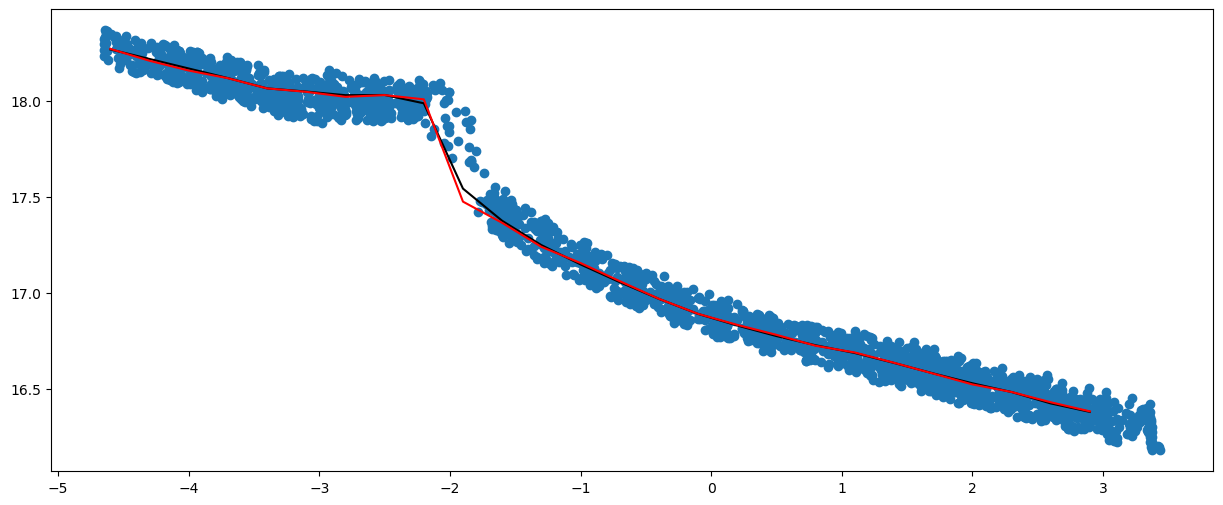

In [149]:
plt.figure(figsize=(15,6))
plt.scatter(df.x,df.z)
plt.plot(np.arange(-4.6, 3.2, sampling_size),df.groupby([xbin, ybin]).mean().z.values, c='k')
plt.plot(np.arange(-4.6, 3.2, sampling_size),df.groupby([xbin, ybin]).median().z.values,c='r')


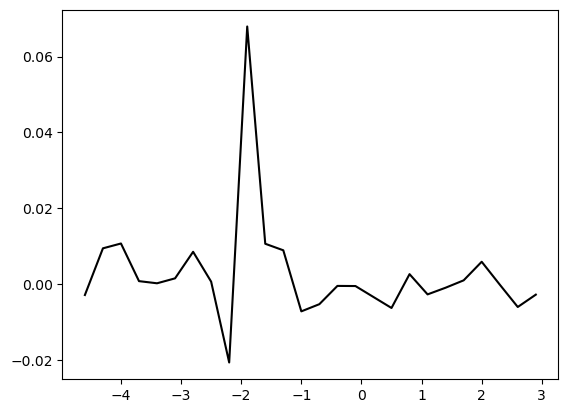

In [150]:
plt.plot(np.arange(-4.6, 3.2, sampling_size),df.groupby([xbin, ybin]).mean().z.values-df.groupby([xbin, ybin]).median().z.values, c='k')

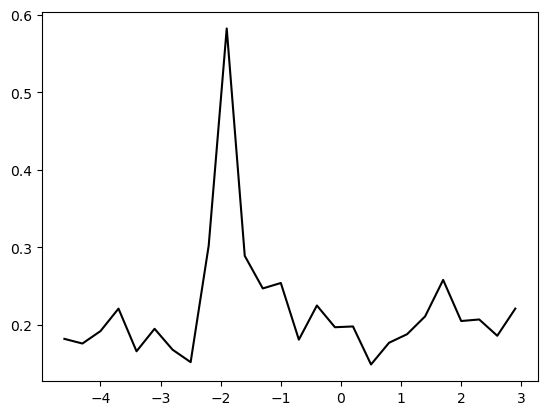

In [151]:
plt.plot(np.arange(-4.6, 3.2, sampling_size),df.groupby([xbin, ybin]).max().z.values-df.groupby([xbin, ybin]).min().z.values, c='k')

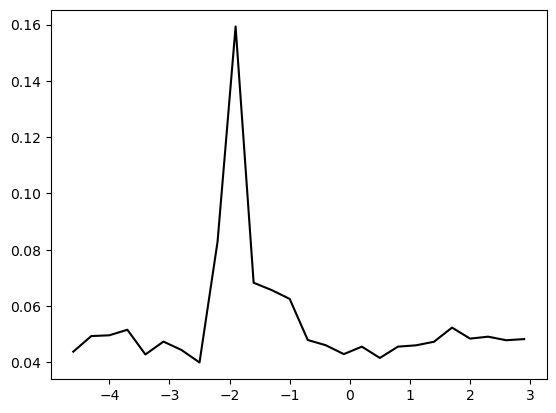

In [152]:
plt.plot(np.arange(-4.6, 3.2, sampling_size),df.groupby([xbin, ybin]).std().z.values, c='k')